# Домашнее задание
# Описательная статистика

## Часть 1 - чистые данные

Библиотека seaborn работает с некоторыми известными датасетами, на которых мы можем опробовать описательный анализ данных.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Мы выбрали датасет mpg, описывающий некоторые из машин бывших в продаже на американском рынке. Довольно интересная информация здесь - характеристика mpg - miles per gallon, сколько миль автомобиль может проехать на галлоне бензина.

In [25]:
data=sns.load_dataset('mpg')

In [26]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Задача 1

### 1.1 Посчитайте среднее значение mpg 

In [27]:
# Вычисление среднего значения mpg
mean_mpg = data['mpg'].mean()

print(f"Среднее значение mpg: {mean_mpg:.2f}")

Среднее значение mpg: 23.51


### 1.2 Посчитайте медиану mpg

In [28]:
# Вычисление медианы mpg
median_mpg = data['mpg'].median()
print(f"Медиана mpg: {median_mpg:.2f}")

Медиана mpg: 23.00


## Задача 2

### Нарисуйте гистограмму величины мpg, используя seaborn.

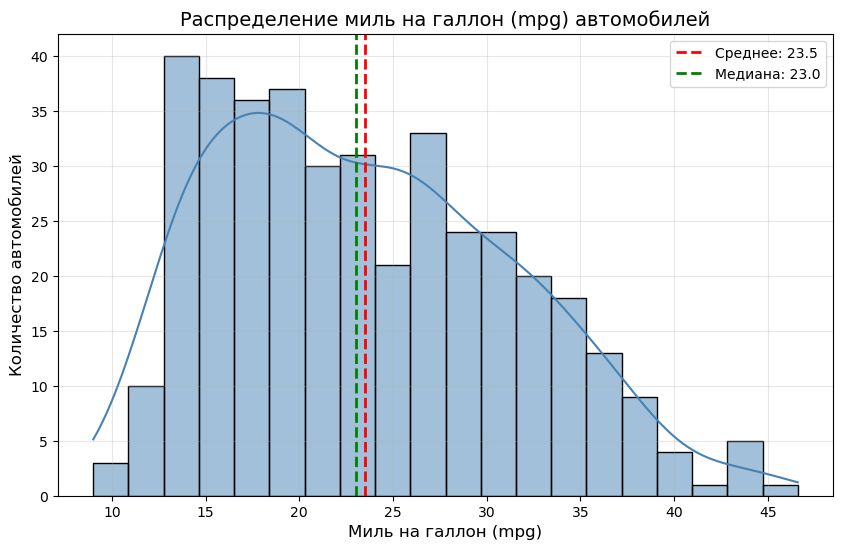

In [29]:
# Создаем гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='mpg', bins=20, kde=True, color='steelblue')

# Добавляем подписи и заголовок
plt.title('Распределение миль на галлон (mpg) автомобилей', fontsize=14)
plt.xlabel('Миль на галлон (mpg)', fontsize=12)
plt.ylabel('Количество автомобилей', fontsize=12)

# Добавляем вертикальные линии для среднего и медианы
mean_mpg = data['mpg'].mean()
median_mpg = data['mpg'].median()
plt.axvline(mean_mpg, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_mpg:.1f}')
plt.axvline(median_mpg, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_mpg:.1f}')

# Добавляем сетку и легенду
plt.grid(True, alpha=0.3)
plt.legend()

# Показываем график
plt.show()

## Задача 3

### 3.1 Нарисуйте 3 ящика с усами, показывающие распределение mpg в зависимости от региона, в котором машина была произведена

Используйте boxplot, давая две переменные х и y. Если вам нужна будет помощь, посмотрите информацию по ссылке: https://seaborn.pydata.org/examples/grouped_boxplot.html

C:\Users\SanzharSabyr\AppData\Local\Temp\ipykernel_19736\1439849212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


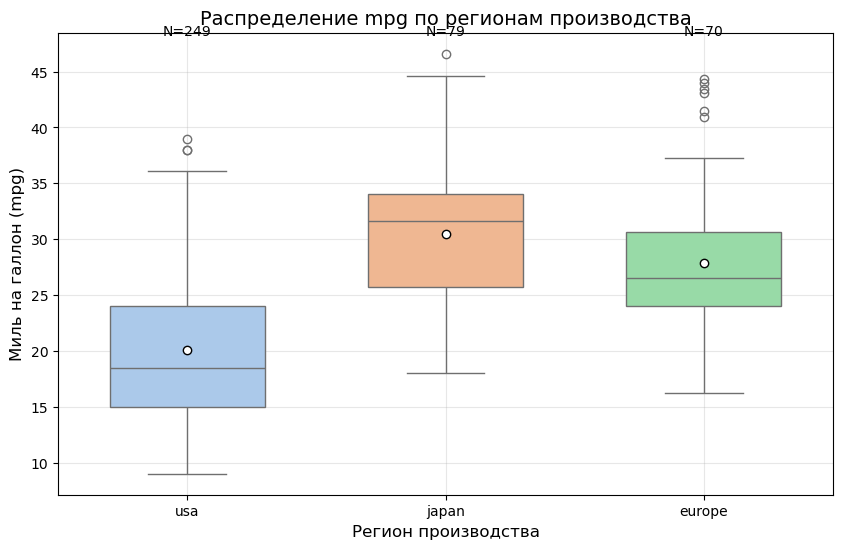

In [30]:
# Создаем график
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='origin', 
    y='mpg', 
    data=data,
    palette='pastel',
    width=0.6,
    showmeans=True,  # Показываем средние значения
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)

# Настраиваем внешний вид графика
plt.title('Распределение mpg по регионам производства', fontsize=14)
plt.xlabel('Регион производства', fontsize=12)
plt.ylabel('Миль на галлон (mpg)', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавляем аннотацию с количеством наблюдений
for i, region in enumerate(data['origin'].unique()):
    count = data[data['origin'] == region].shape[0]
    plt.text(i, data['mpg'].max() + 2, f'N={count}', ha='center', va='center')

plt.show()

### 3.2 Нарисуйте ящики с усами, показывающие распределение mpg, в зависимости от количества цилиндров автомобиля

C:\Users\SanzharSabyr\AppData\Local\Temp\ipykernel_19736\687453547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


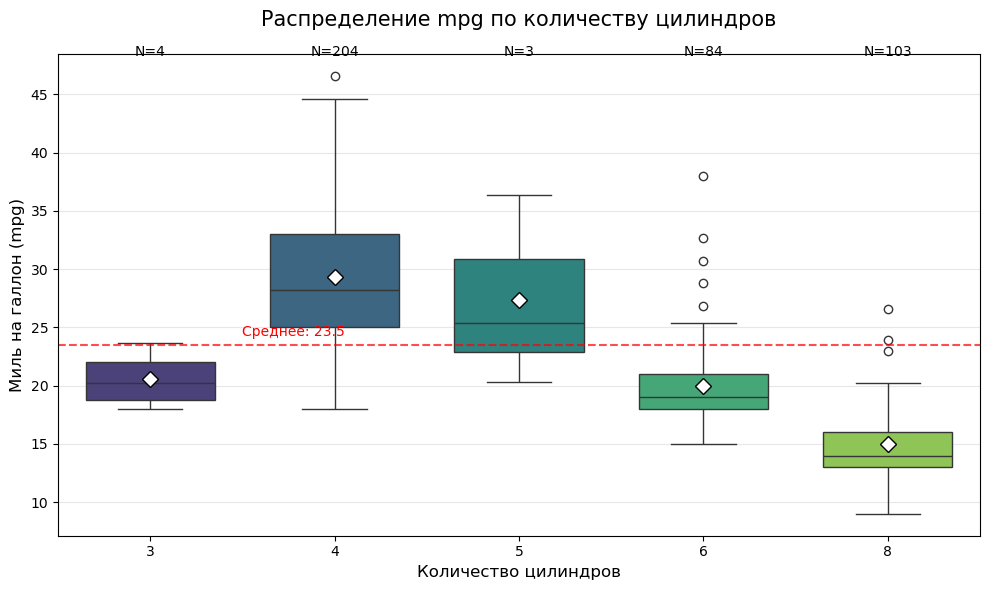

In [31]:
# Создаем график
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='cylinders', 
    y='mpg', 
    data=data,
    palette='viridis',
    width=0.7,
    showmeans=True,
    meanprops={'marker':'D', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'}
)

# Настраиваем внешний вид графика
plt.title('Распределение mpg по количеству цилиндров', fontsize=15, pad=20)
plt.xlabel('Количество цилиндров', fontsize=12)
plt.ylabel('Миль на галлон (mpg)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Добавляем аннотации с количеством наблюдений
for i, cyl in enumerate(sorted(data['cylinders'].unique())):
    count = data[data['cylinders'] == cyl].shape[0]
    ax.text(i, data['mpg'].max() + 2, f'N={count}', ha='center', va='center', fontsize=10)

# Добавляем горизонтальную линию для среднего по всем данным
overall_mean = data['mpg'].mean()
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
plt.text(0.5, overall_mean+0.5, f'Среднее: {overall_mean:.1f}', color='red', ha='left', va='bottom')

plt.tight_layout()
plt.show()

## Задача 4

### 4.1 Нарисуйте scatter plot количества лошадинных сил против рабочего объема (displacement). Что вы думаете об их связи между собой?

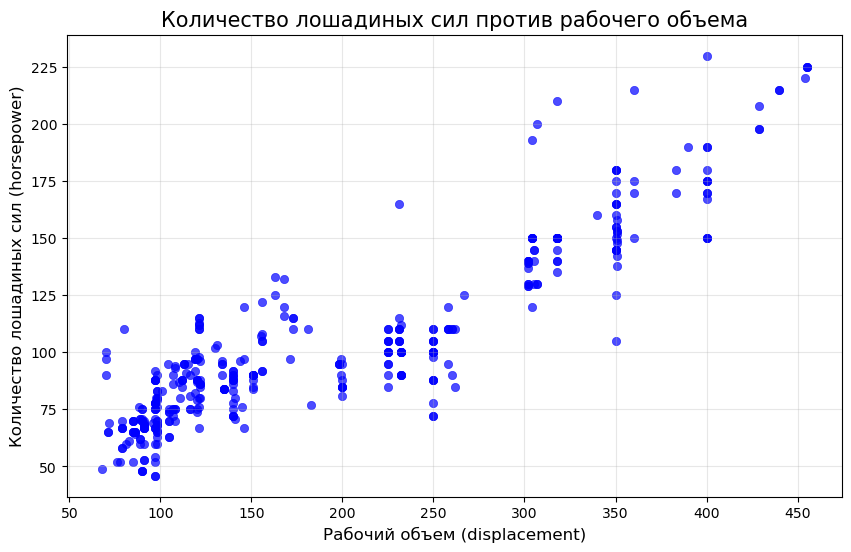

In [32]:
# Создаем график
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='displacement', 
    y='horsepower', 
    data=data, 
    color='blue', 
    alpha=0.7, 
    edgecolor=None
)

# Настраиваем внешний вид графика
plt.title('Количество лошадиных сил против рабочего объема', fontsize=15)
plt.xlabel('Рабочий объем (displacement)', fontsize=12)
plt.ylabel('Количество лошадиных сил (horsepower)', fontsize=12)
plt.grid(True, alpha=0.3)

# Показываем график
plt.show()

### 4.2 Нарисуйте scatter plot  рабочего объема против mpg. Что вы думаете об их связи между собой?

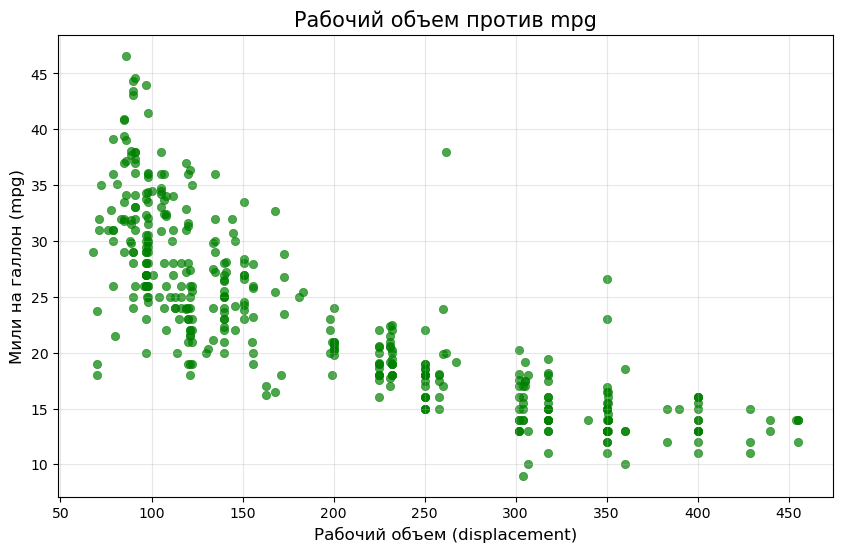

In [33]:
# Создаем график
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='displacement', 
    y='mpg', 
    data=data, 
    color='green', 
    alpha=0.7, 
    edgecolor=None
)

# Настраиваем внешний вид графика
plt.title('Рабочий объем против mpg', fontsize=15)
plt.xlabel('Рабочий объем (displacement)', fontsize=12)
plt.ylabel('Мили на галлон (mpg)', fontsize=12)
plt.grid(True, alpha=0.3)

# Показываем график
plt.show()

### 4.3 Нарисуйте scatter plot  рабочего объема против mpg и покрасьте точки в зависимости от страны производства автомобиля (hue=...).  Что вы думаете?

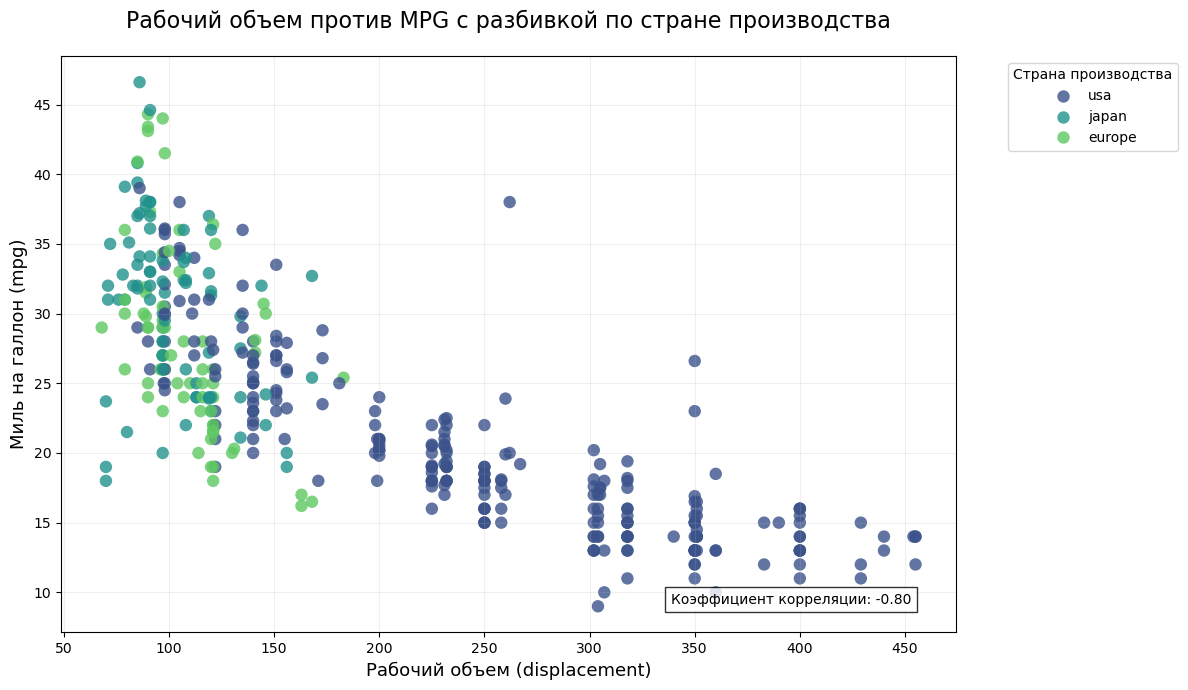

In [34]:
# Создаем график с разными цветами для стран производства
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x='displacement',
    y='mpg',
    hue='origin',  # Раскрашиваем точки по стране производства
    data=data,
    palette='viridis',  # Цветовая палитра
    alpha=0.8,
    s=80,  # Размер точек
    edgecolor='none'
)

# Настройка внешнего вида
plt.title('Рабочий объем против MPG с разбивкой по стране производства', fontsize=16, pad=20)
plt.xlabel('Рабочий объем (displacement)', fontsize=13)
plt.ylabel('Миль на галлон (mpg)', fontsize=13)
plt.grid(True, alpha=0.2)

# Выносим легенду за пределы графика
plt.legend(title='Страна производства', bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавляем аннотацию с корелляцией
corr = data[['displacement', 'mpg']].corr().iloc[0,1]
plt.text(0.95, 0.05, f'Коэффициент корреляции: {corr:.2f}',
         transform=plt.gca().transAxes, ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## Часть 2 - Данные из бизнеса

## Задача 5

Прочитайте данные ('listings.csv') в Pandas dataframe и покажите их голову. Это данные от AirBnB, описывающие часть квартир и комнат на сдачу в Амстердаме.

In [35]:
# Чтение данных из CSV файла
data = pd.read_csv('listings.csv')

# Показать первые 5 строк DataFrame
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.92,1,139
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,129,1,339,2020-04-09,2.54,2,0
2,25428,"Lovely, spacious 1 bed apt in Center(with lift)",56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.13,1,251
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,125,2,219,2020-07-25,1.98,1,136
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.63,2,338


## Задача 6

### 6.1 Используя countplot, ответьте на вопрос: 
### Какой тип комнаты самый распространенный в Амстердаме? https://seaborn.pydata.org/generated/seaborn.countplot.html

C:\Users\SanzharSabyr\AppData\Local\Temp\ipykernel_19736\3434548619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


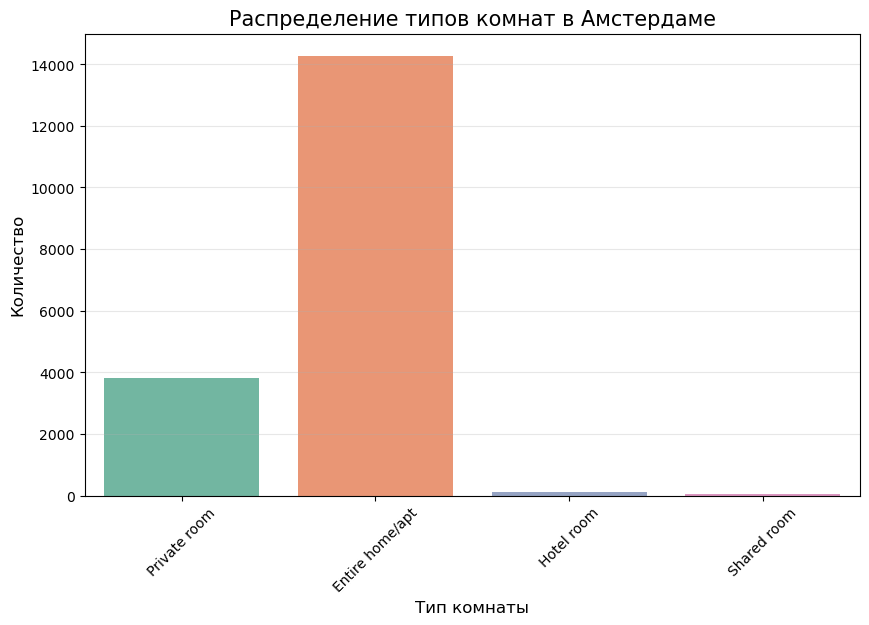

In [43]:
# Чтение данных из CSV файла
data = pd.read_csv('listings.csv')

# Создаем график countplot для типов комнат
plt.figure(figsize=(10, 6))
sns.countplot(
    x='room_type', 
    data=data, 
    palette='Set2'
)

# Настраиваем внешний вид графика
plt.title('Распределение типов комнат в Амстердаме', fontsize=15)
plt.xlabel('Тип комнаты', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid(axis='y', alpha=0.3)

# Показываем график
plt.show()

### 6.2 Нарисуйте ящики с усами, показывающие распределение цены в зависимости от района, в котором находится квартира/комната. Видите ли вы проблему?

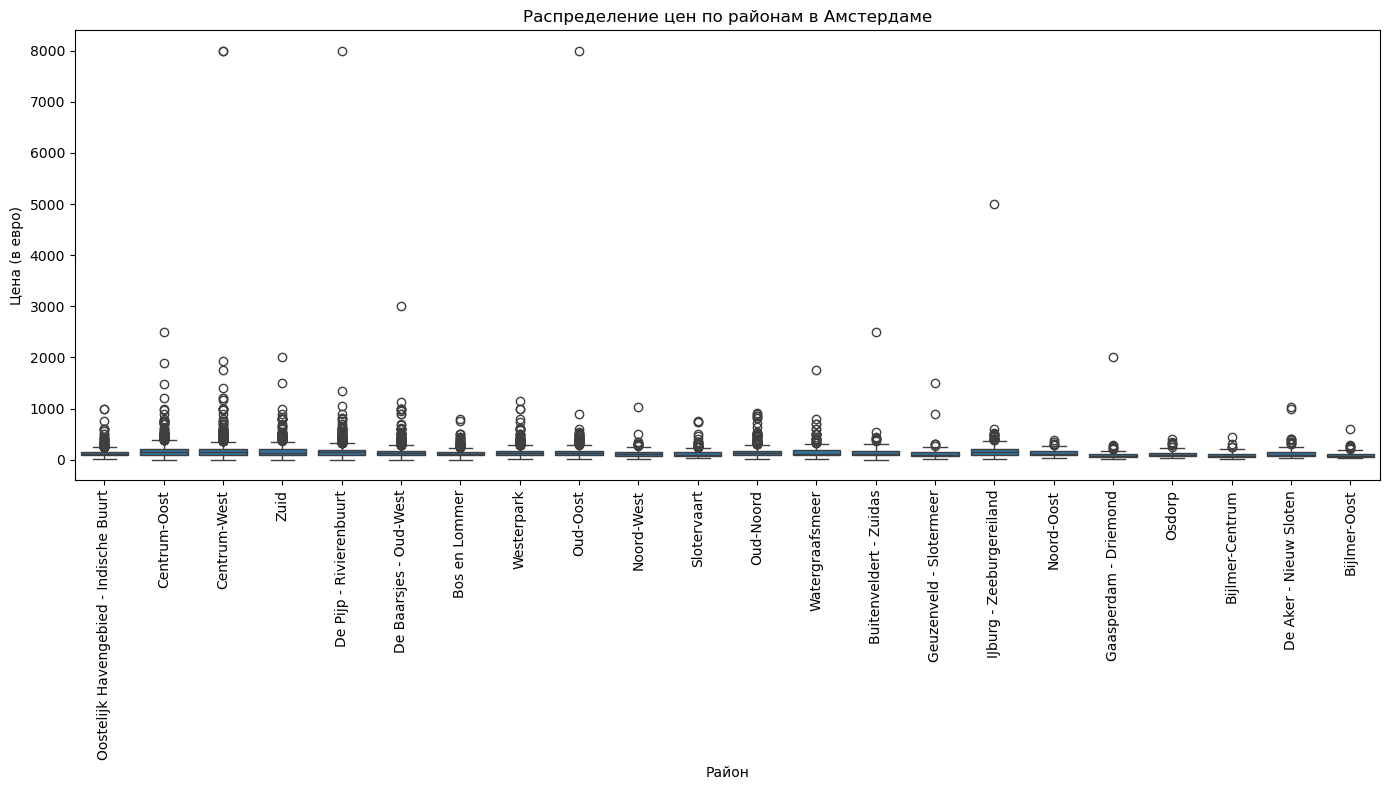

In [49]:
# Построение boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='neighbourhood', y='price')
plt.xticks(rotation=90)
plt.title('Распределение цен по районам в Амстердаме')
plt.xlabel('Район')
plt.ylabel('Цена (в евро)')
plt.tight_layout()
plt.show()

# Возможная проблема:
# Много выбросов (очень высокие цены), которые искажают масштаб графика.
# Некоторые районы могут быть представлены слабо, что делает сравнение менее надёжным.

### 6.3 Нарисуйте ящики с усами, показывающие распределение цены в зависимости от района, в котором находится квартира/комната, используйте следующую команду в boxplot showfliers=False. Что изменилось?

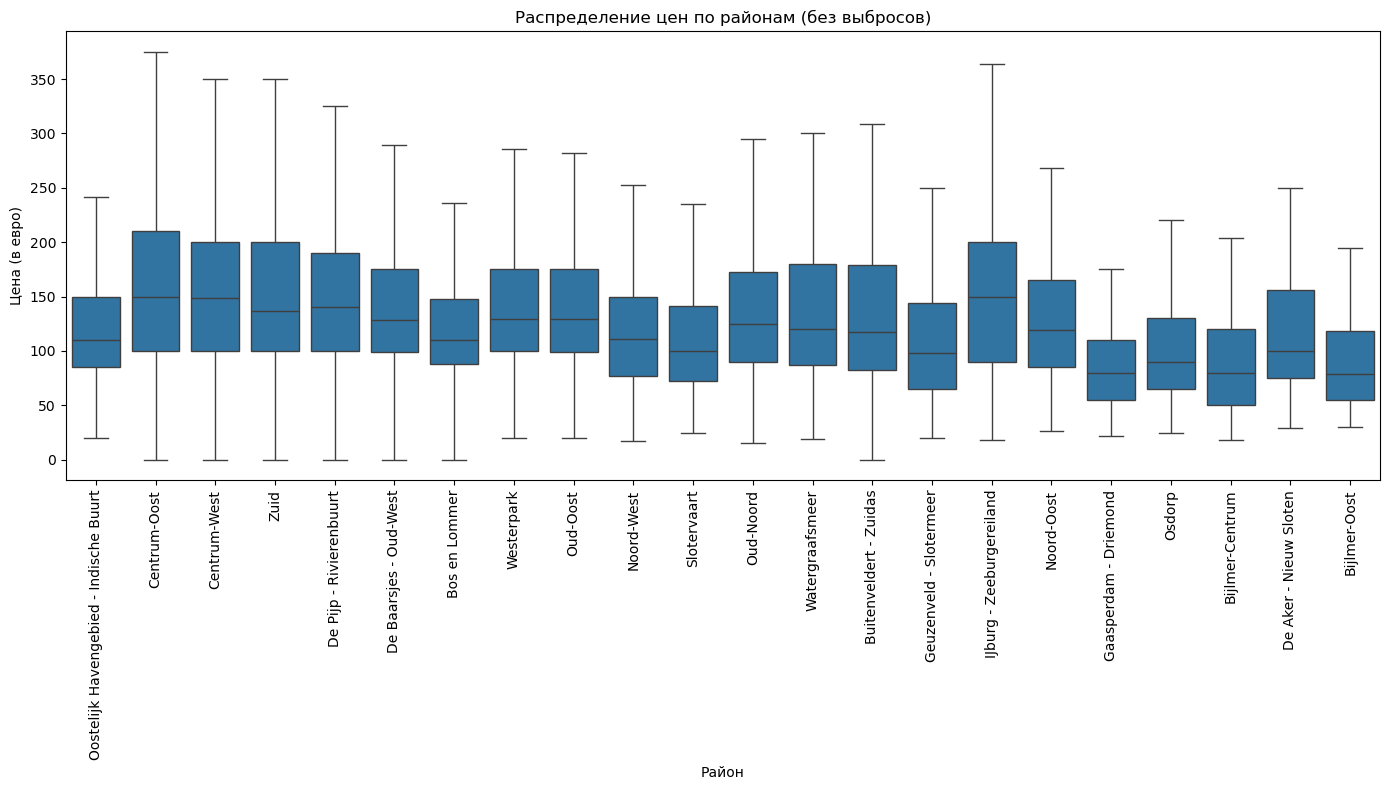

In [50]:
# Построение boxplot без выбросов
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='neighbourhood', y='price', showfliers=False)
plt.xticks(rotation=90)
plt.title('Распределение цен по районам (без выбросов)')
plt.xlabel('Район')
plt.ylabel('Цена (в евро)')
plt.tight_layout()
plt.show()

# Что изменилось?
# Выбросы (очень высокие или низкие значения) больше не отображаются на графике.
# Это делает ящики более читаемыми, особенно если в данных есть экстремальные значения, которые сильно растягивают шкалу.
# Такой подход помогает лучше сравнивать медианы и межквартильные размахи между районами.

### 6.4 Создайте гистограмму цен для самого распространенного типа комнат в Амстердаме. С какими проблемами вы столкнулись?

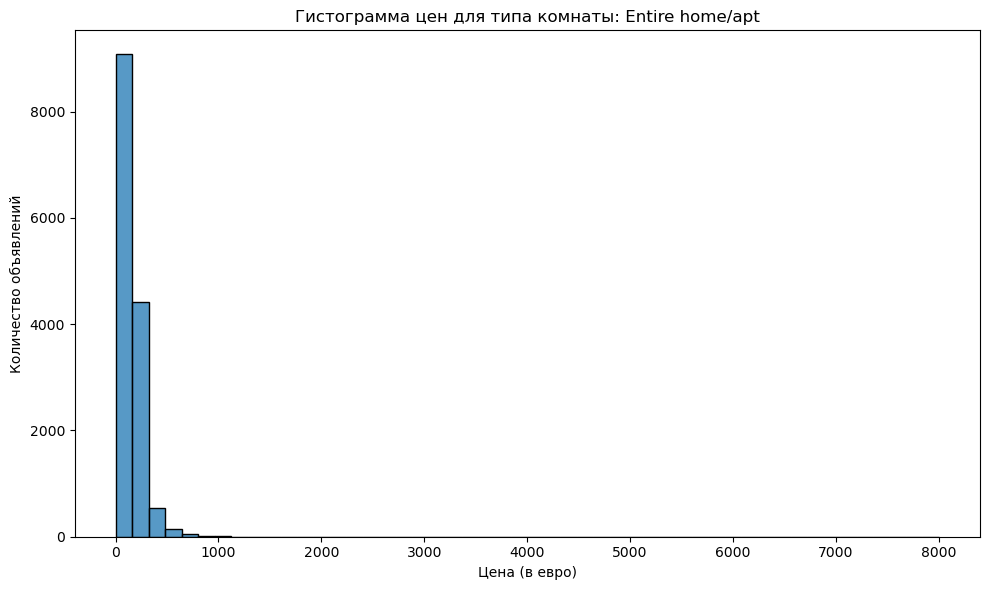

In [56]:
# Определение самого распространённого типа комнаты
most_common_room_type = df['room_type'].value_counts().idxmax()

# Фильтрация по этому типу и удаление нулевых или отрицательных цен
filtered_df = df[(df['room_type'] == most_common_room_type) & (df['price'] > 0)]

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['price'], bins=50)
plt.title(f'Гистограмма цен для типа комнаты: {most_common_room_type}')
plt.xlabel('Цена (в евро)')
plt.ylabel('Количество объявлений')
plt.tight_layout()
plt.show()